## Analyzing the Relationship Between Age Demographics and Crime Trends in Berlin Neighborhoods

### Outline
1. Introduction<br>
2. Data Source Info<br>
3. Project Structure: ETL pipeline<br>
4. Install Dependencies<br>
5. Importing Packages<br>
6. Loading Data<br>
7. Data Preprocessing and Exploratory Data Analysis of the 2 Dataset<br>
    7.1. Population Dataset Analysis<br>
    7.2. Berlin Crime  Dataset Analysis<br>
8. Key Findings From the Analysis<br>
    8.1 Population Dataset<br>
    8.2 Berlin Crime Dataset<br> 
    8.3 Combined Analysis after comparing both datasets<br>

9. Answering the key questions<br>
    9.1 Is there Connection between age demographics and crime in Berlin?<br>
    9.2 Are Certain areas of Berlin more dangerous than others?<br>
    9.3 Which crimes are increasing or decreasing in Berlin?<br>
    
10. Limitation Conclusion<br>

#### 1. Introduction
This project aims to analyze the population and crime record data of Berlin. It start by preparing and analyzing each of the dataset separately to find out interesting insights about the data. After that, we try to find out if the population distrubution in Berlin has any interesting relation with different types of crime in Berlin. This project is using two different datasets from kaggle population  and Berlin Crime. population dataset provides info on different age group and gender population in different distrcts of Berlin. The Berlin Crime data provides information on different crimes and their count in different areas of Berlin. 
The project tries to answer the following questions
1. If the density of different age groups or gender in Berlin have an impact on the crimes happening in that area?
2. Are different crimes increasing or decreasing over the years?
3. Are some areas in Berlin more dangerous than the others?

#### 2. Data Source Info
Datasource1: Kaggle
Metadata URL: https://www.kaggle.com/datasets/shreejahoskerenatesh/berlin-district-population
Data Type: CSV

Datasource2: Kaggle
Metadata URL: https://www.kaggle.com/datasets/danilzyryanov/crime-in-berlin-2012-2019
Data Type: CSV

#### 3. Project Structure: ETL pipeline
The project follows a structured ETL (Extract, Transform, Load) pipeline approach, encompassing various directories and modules with specific functionalities. The `pipeline.sh` file in the project folder serves as the entry point for running the pipeline using the command `./pipeline.sh`, resulting in the generation of the final dataset stored in an SQLite database as my_database.sqlite.

```bash
project/
├── data/                       # Data directory
│                    
├── pipelines/                  # Data pipeline modules
│   ├── __init__.py
│   └── pipeline.py             # ETL data pipeline implementation
├── tests/                      # Test modules
│   ├── __init__.py
│   ├── pipilinetest.py         # Test cases for component and system testing
├── __init__.py.                   
├── final_report.ipynb          # Notebook for final project report
├── pipeline.sh                 # main file to run the ETL pipeline
├── project-plan.md             # Project plan and documentation
└── run_pipeline.py             # defining the databases and calling the pipelines
├── tests.sh                    # file to run all the tests.
```

#### 4. Install Dependencies
To install the dependencies for this project, run the following command to install the dependencies specified in the requirements.txt file
: pip install -r requirements.txt

#### 5. Importing Packages

In [1]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

#### 6. Loading Data
This section involves retrieving the data from a sqlite database and loading it into two Pandas DataFrames. 

In [2]:
conn = sqlite3.connect("data/my_database.sqlite")
population_df = pd.read_sql_query(f"SELECT * FROM population", conn)
Berlin_Crime_df = pd.read_sql_query(f"SELECT * FROM Berlin_Crime", conn)
conn.close()

#### 7. Data Preprocessing and Exploratory Data Analysis of the 2 Dataset
##### 7.1 Population Dataset Analysis

In [3]:
population_df.rename(columns={"Bezirk":"District","Darunter\nweiblich":"Female","Ins-\ngesamt":"Total",
                     "65 und\nmehr":"above 65","Postleitzah":"Postalcode", "unter 6":"under6"}, inplace=True)
population_df.head()

,Postalcode,District,Total,under6,6 - 15,15 - 18,18 - 27,27 - 45,45 - 55,55 - 65,above 65,Female
0,10115,Mitte,26274,1754,2051,473,2461,11595,4253,2041,1646,12818
1,10117,Mitte,15531,782,881,250,1558,5346,2342,1854,2518,7489
2,10119,Mitte,15064,1014,1087,213,1319,6650,2543,1158,1080,7489
3,10119,Pankow,4606,336,426,118,423,1753,991,349,210,2258
4,10178,Mitte,14385,692,714,203,1588,5100,1856,1473,2759,6953


In [4]:

population_df['District'] = population_df['District'].replace({
    'Friedrichsh.-Kreuzb.': 'Friedrichshain-Kreuzberg',
    'Tempelh.-Sch\x9aneb.': 'Tempelhof-Schöneberg',
    'Neuk\x9alln': 'Neukölln',
    'Treptow-K\x9apenick': 'Treptow-Köpenick' 
})


In [5]:
population_df['District'].unique()

array(['Mitte', 'Pankow', 'Friedrichshain-Kreuzberg', 'Lichtenberg',
       'Charlbg.-Wilmersd.', 'Tempelhof-Schöneberg', 'Neukölln',
       'Steglitz-Zehlend.', 'Treptow-Köpenick', 'Marzahn-Hellersd.',
       'Reinickendorf', 'Spandau'], dtype=object)

In [6]:
population_df['District'].nunique()

12

##### Finding out the Male population
I understand that we can't find the exact male population simply by subtracting it from total as there might be other genders. However, I believe it can still give a close estimation 

In [7]:
population_df['Male'] = population_df['Total']-population_df['Female']
population_column_names = population_df.columns.tolist()
print(population_column_names)

['Postalcode', 'District', 'Total', 'under6', ' 6 - 15', '15 - 18', '18 - 27', '27 - 45', '45 - 55', '55 - 65', 'above 65', 'Female', 'Male']


#### Population groups across differect Districts of Berlin
Here we Find out which districts holds the highest to lowest number of population in Berlin based on gender and different age groups

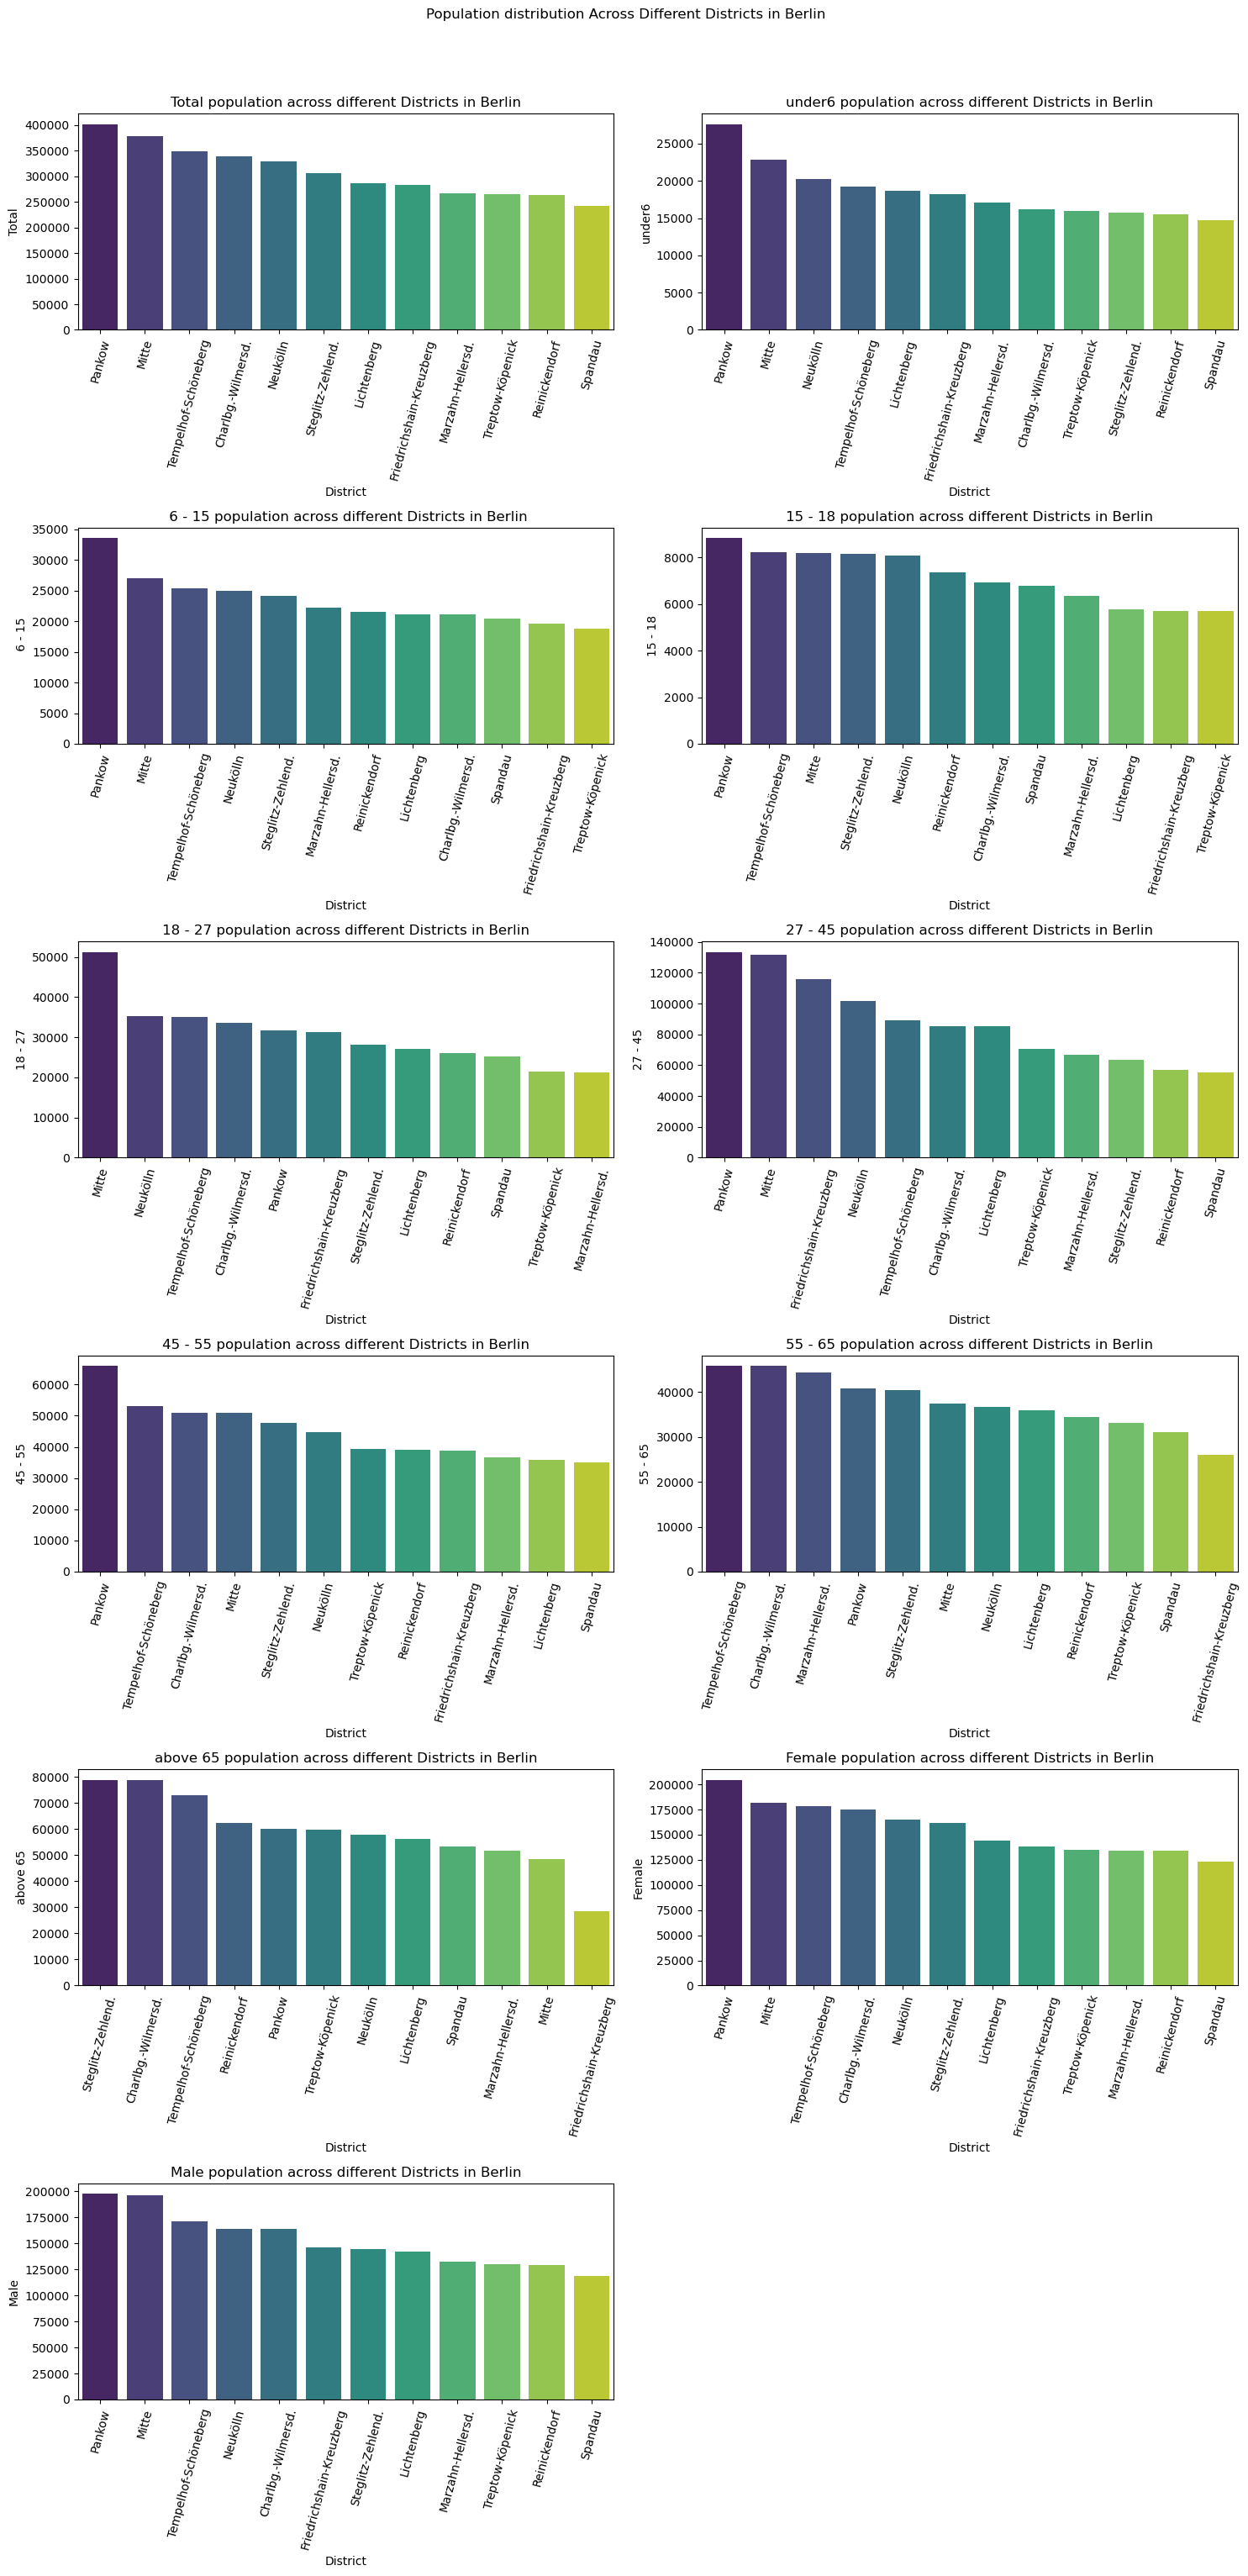

In [8]:
# The columns we want in the x axis of our graph
population_columns = ['Total', 'under6', ' 6 - 15', '15 - 18', '18 - 27', '27 - 45', '45 - 55', '55 - 65', 'above 65', 'Female', 'Male']

# Set the number of columns for subplots
num_cols = 2

# Calculate the number of rows needed
num_rows = (len(population_columns) + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
fig.suptitle('Population distribution Across Different Districts in Berlin', y=1.02)

# Iterate over each crime column and create a subplot
for i, population_type in enumerate(population_columns):
    row = i // num_cols
    col = i % num_cols

    # Group by District and sum the crime counts
    population_distribution_df = population_df.groupby('District')[population_type].sum().reset_index()

    # Sort the values in descending order
    population_distribution_df = population_distribution_df.sort_values(by=population_type, ascending=False)

    # Create a bar plot for the current crime type
    ax = axes[row, col] if num_rows > 1 else axes[col]
    plot = sns.barplot(data=population_distribution_df, x='District', y=population_type, palette='viridis', ax=ax)
    ax.set_title(f'{population_type} population across different Districts in Berlin')
    plt.setp(ax.get_xticklabels(), rotation=75)

# Hide any empty subplots
for i in range(len(population_columns), num_cols * num_rows):
    if num_rows > 1:
        fig.delaxes(axes.flatten()[i])
    else:
        fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


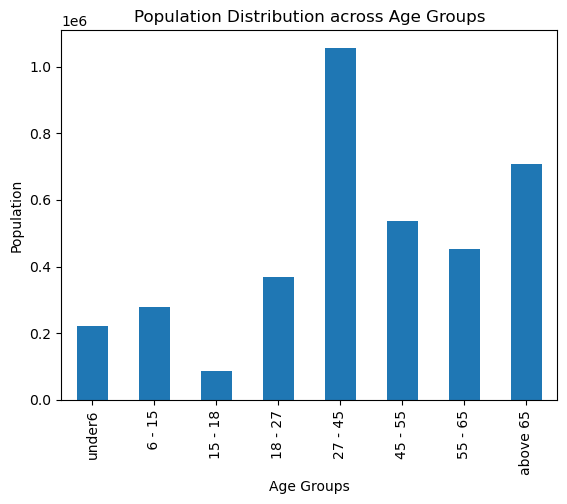

In [9]:
age_groups = population_df.columns[3:11]
population_df[age_groups].sum().plot(kind='bar', xlabel='Age Groups', ylabel='Population', title='Population Distribution across Age Groups')
plt.show()

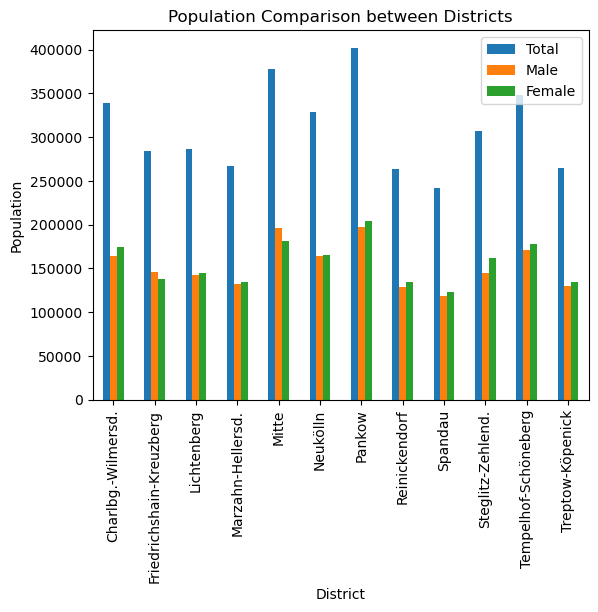

In [10]:
MaleFemaleDistrictCount_df = population_df.groupby('District').sum()
MaleFemaleDistrictCount_df[['Total','Male', 'Female']].plot(kind='bar', stacked=False, title='Population Comparison between Districts')
plt.xlabel('District')
plt.ylabel('Population')
plt.show()

##### 7.2 Berlin Crime  Dataset Analysis

In [11]:
Berlin_Crime_df['District'].unique()


array(['Mitte', 'Friedrichshain-Kreuzberg', 'Pankow',
       'Charlottenburg-Wilmersdorf', 'Spandau', 'Steglitz-Zehlendorf',
       'Tempelhof-Schöneberg', 'Neukölln', 'Treptow-Köpenick',
       'Marzahn-Hellersdorf', 'Lichtenberg', 'Reinickendorf'],
      dtype=object)

In [12]:
Berlin_Crime_df['District'].nunique()

12

Number of Districts and their names match in both the datasets which will be helpful to compare them

In [13]:
Berlin_Crime_df.head(2)

,Year,District,Code,Location,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local
0,2012,Mitte,10111,Tiergarten Süd,70,46,586,194,118,2263,18,328,120,68,16,4,273,26,171,1032
1,2012,Mitte,10112,Regierungsviertel,65,29,474,123,142,3203,10,307,170,37,10,4,380,124,98,870


In [14]:
total_crime_df = Berlin_Crime_df.drop(["Year","Code","Location"], axis=1)
total_crime_df.head(2)

,District,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local
0,Mitte,70,46,586,194,118,2263,18,328,120,68,16,4,273,26,171,1032
1,Mitte,65,29,474,123,142,3203,10,307,170,37,10,4,380,124,98,870


##### Finding out districts with highest amount of crimes

In [15]:
total_distrcit_crime_df = pd.DataFrame(total_crime_df.groupby("District").sum().sum(axis=1)).sort_values(by=0, ascending=False)
total_distrcit_crime_df

,0
District,
Mitte,727648
Friedrichshain-Kreuzberg,522186
Charlottenburg-Wilmersdorf,469618
Neukölln,411786
Pankow,399058
Tempelhof-Schöneberg,368459
Reinickendorf,263585
Lichtenberg,256785
Steglitz-Zehlendorf,243033


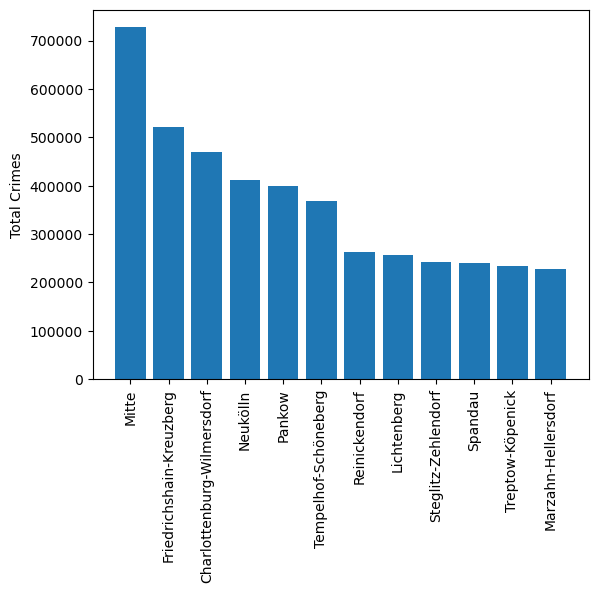

In [16]:
plt.bar(total_distrcit_crime_df.index, total_distrcit_crime_df[0])
plt.ylabel("Total Crimes")
plt.xticks(rotation=90);

### Finding out which crimes are increasing or decreasing in Berlin Over time

In [17]:
CrimeList = np.array(Berlin_Crime_df.columns)
CrimeList

array(['Year', 'District', 'Code', 'Location', 'Robbery',
       'Street_robbery', 'Injury', 'Agg_assault', 'Threat', 'Theft',
       'Car', 'From_car', 'Bike', 'Burglary', 'Fire', 'Arson', 'Damage',
       'Graffiti', 'Drugs', 'Local'], dtype=object)

In [18]:
CrimeList = np.delete(CrimeList, [0, 1, 2, 3])
CrimeList

array(['Robbery', 'Street_robbery', 'Injury', 'Agg_assault', 'Threat',
       'Theft', 'Car', 'From_car', 'Bike', 'Burglary', 'Fire', 'Arson',
       'Damage', 'Graffiti', 'Drugs', 'Local'], dtype=object)

In [19]:
crimes_yearly_df = []
for i in CrimeList:
    crimes_yearly_df.append(Berlin_Crime_df.groupby(by="Year")[i].sum())

crimes_yearly_df = pd.DataFrame(crimes_yearly_df).transpose()
crimes_yearly_df

,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local
Year,,,,,,,,,,,,,,,,
2012,6283,2886,42153,11032,14196,207340,5732,30503,25836,12285,2514,904,48582,11070,11687,101472
2013,6088,3135,41461,10247,14333,220417,6628,35652,26389,11563,2561,972,43176,9573,12746,101063
2014,5583,3228,39190,9515,13733,229955,6629,36032,30434,12149,2322,908,40678,8166,12878,97700
2015,5318,2914,39312,9664,13260,251366,6649,34741,31937,11805,2103,834,39841,8471,15176,100220
2016,5046,2962,41339,10024,13557,251192,7305,34515,34136,11487,2529,1032,41768,9015,14407,100073
2017,4165,2324,42283,10608,13452,220220,6642,32308,30082,8572,2210,872,40985,10428,15503,95027
2018,4202,2417,42828,10656,13965,209957,5671,28677,29978,7568,2334,886,39883,9103,16700,97763
2019,4395,2627,43035,10754,14604,200322,5751,25902,28456,7958,2616,1130,42986,9635,18334,101581


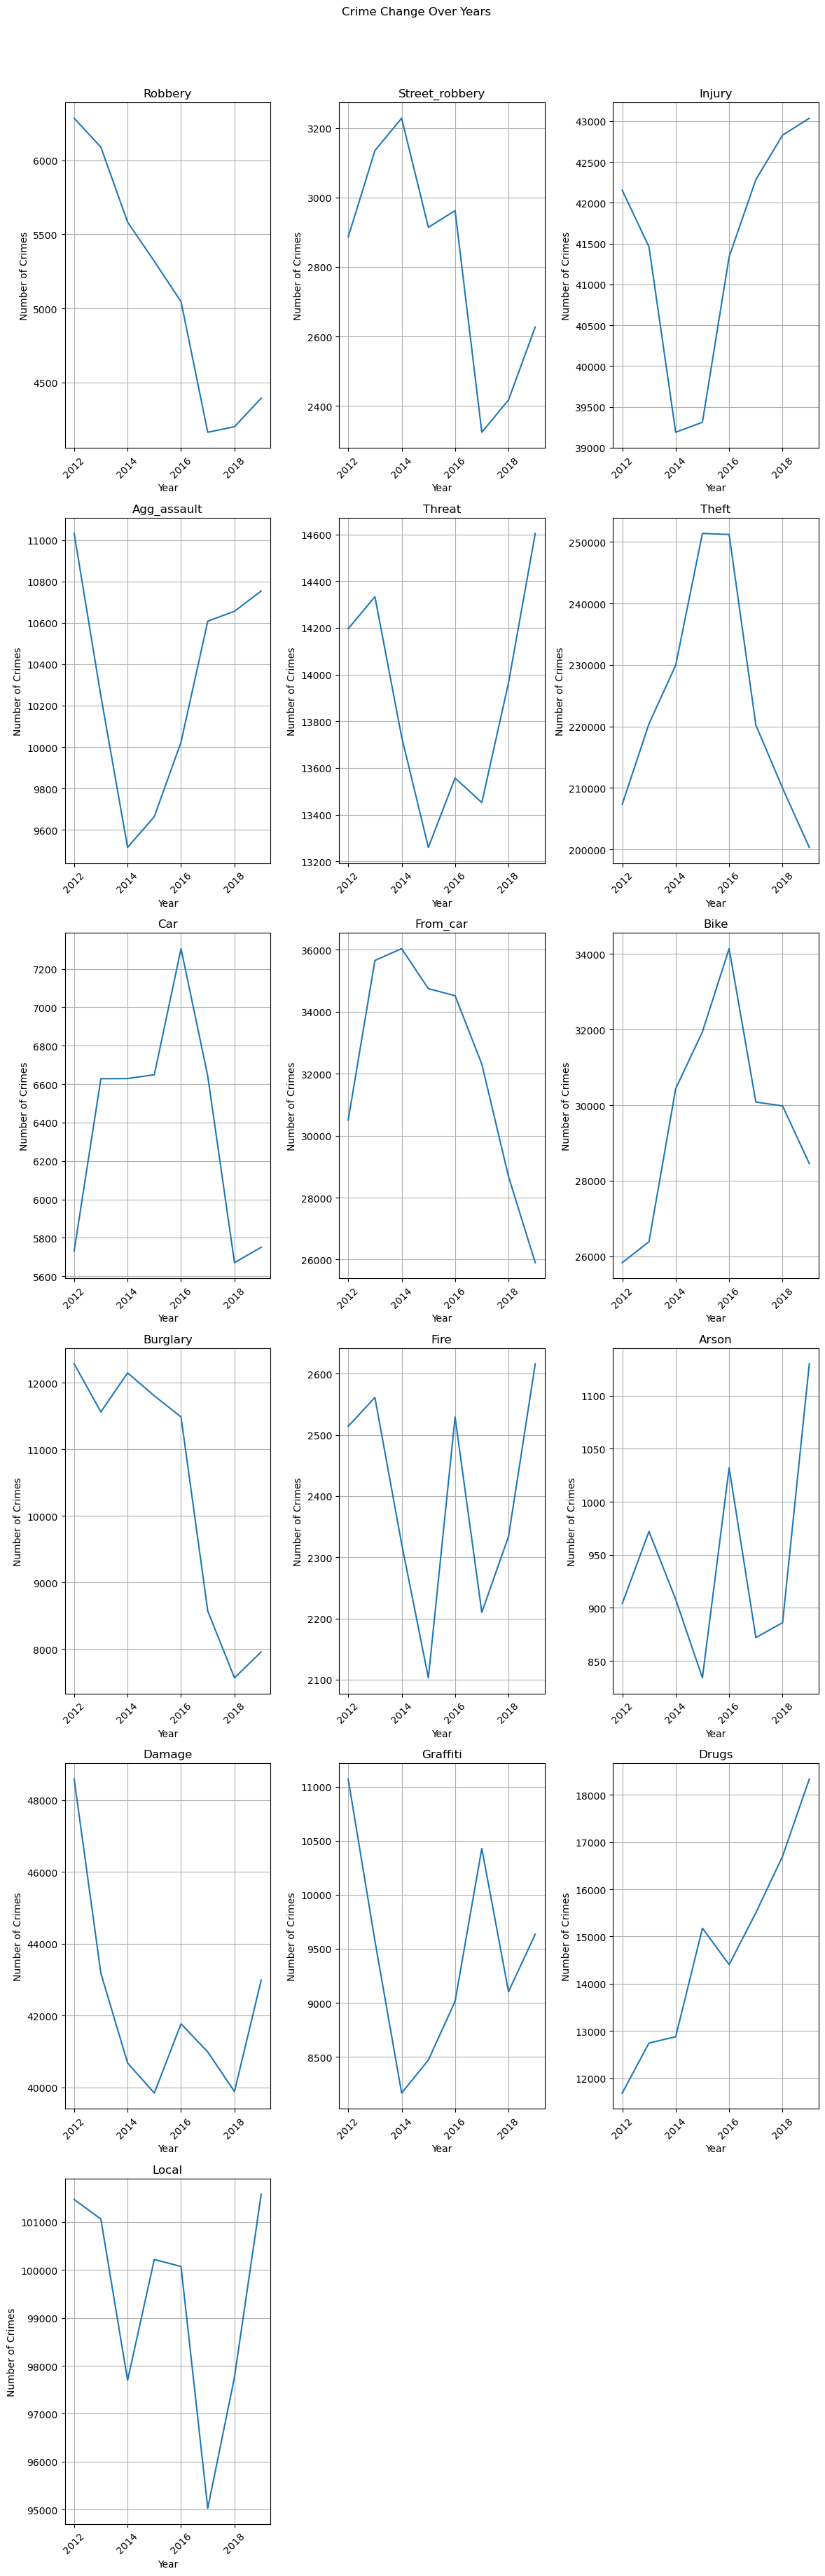

In [20]:
num_plots = len(CrimeList)
num_cols = 3  # Change to 3 for three columns
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows))
fig.suptitle('Crime Change Over Years', y=1.02)

for i, crime_type in enumerate(CrimeList):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    ax.plot(crimes_yearly_df.index, crimes_yearly_df[crime_type])
    ax.set_title(crime_type)
    ax.set_xlabel('Year')
    ax.set_ylabel('Number of Crimes')
    ax.grid(True)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()

# Remove empty subplots if there are any
for i in range(num_plots, num_cols * num_rows):
    fig.delaxes(axes.flatten()[i])

plt.show()


#### Crime Count across different distrct in Berlin 

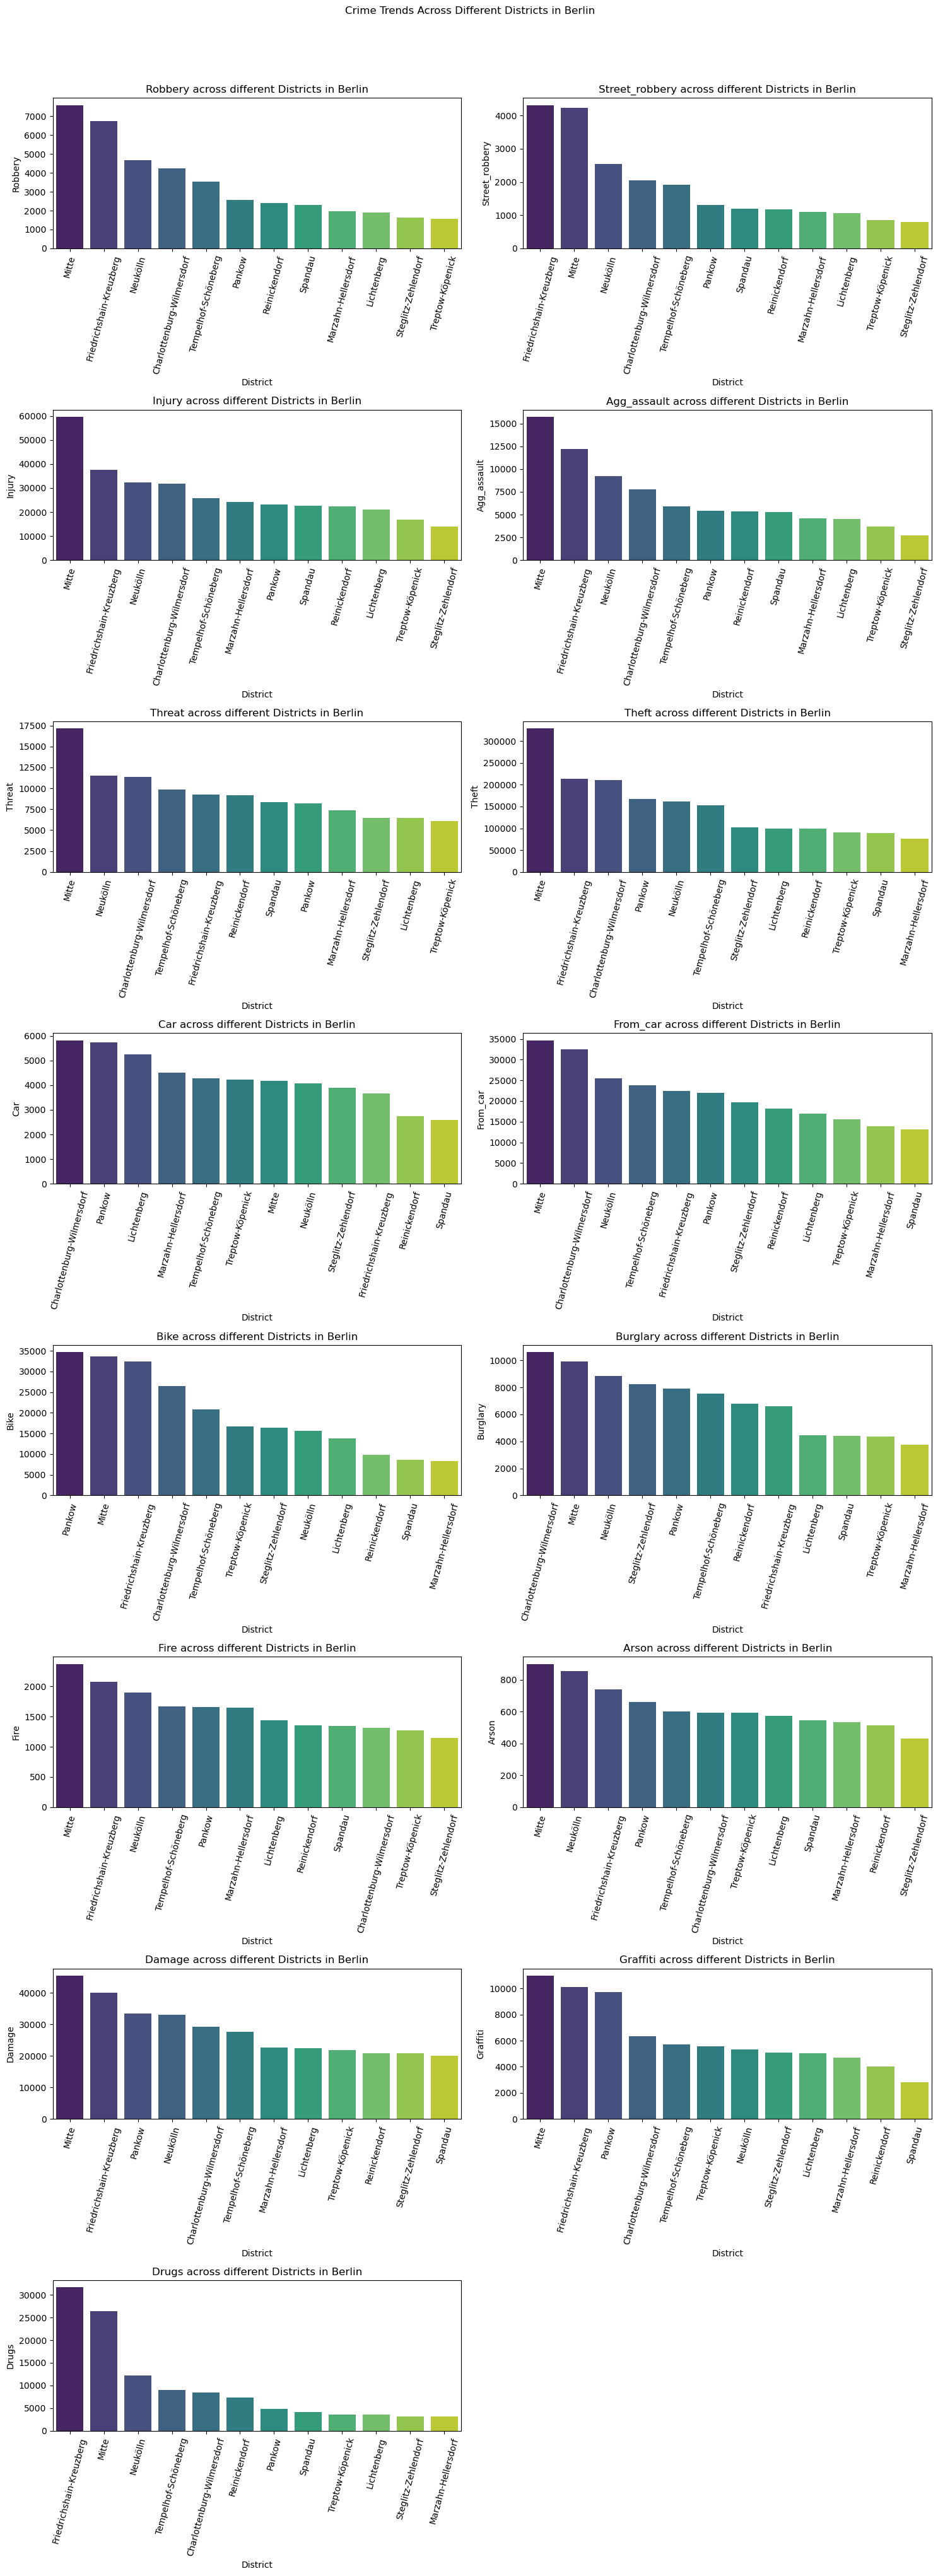

In [21]:


# List of crime columns excluding the first 4 non-crime columns
crime_columns = ['Robbery', 'Street_robbery', 'Injury', 'Agg_assault', 'Threat', 'Theft', 'Car', 'From_car', 'Bike', 'Burglary', 'Fire', 'Arson', 'Damage', 'Graffiti', 'Drugs']

# Set the number of columns for subplots
num_cols = 2

# Calculate the number of rows needed
num_rows = (len(crime_columns) + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
fig.suptitle('Crime Trends Across Different Districts in Berlin', y=1.02)

# Iterate over each crime column and create a subplot
for i, crime_type in enumerate(crime_columns):
    row = i // num_cols
    col = i % num_cols

    # Group by District and sum the crime counts
    crime_df = Berlin_Crime_df.groupby('District')[crime_type].sum().reset_index()

    # Sort the values in descending order
    crime_df = crime_df.sort_values(by=crime_type, ascending=False)

    # Create a bar plot for the current crime type
    ax = axes[row, col] if num_rows > 1 else axes[col]
    plot = sns.barplot(data=crime_df, x='District', y=crime_type, palette='viridis', ax=ax)
    ax.set_title(f'{crime_type} across different Districts in Berlin')
    plt.setp(ax.get_xticklabels(), rotation=75)

# Hide any empty subplots
for i in range(len(crime_columns), num_cols * num_rows):
    if num_rows > 1:
        fig.delaxes(axes.flatten()[i])
    else:
        fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


#### 8 Key Findings From the Analysis

##### 8.1 Population Dataset
1. The age group 27-45 is the largest age group by count in Berlin. 2nd largest is above 65 age group
2. Pankow and Mitte are the districts with Highest population
3. The Male and Female population in any of the district isn’t significantly more than other. 

##### 8.2 Berlin Crime Dataset
1.	Mitte and Friedrichshain-Kreuzberg have the highest amount of Total Crimes in the City and also are the top two Districts when it comes to most types of crime
2.	Charlottenburg-Wilmersdorf and Pankow have the highest  number of Car and Bike related crimes.
3.	Crimes like robbery, theft  and crimes related to bike and car have decreased over the years while  assault, arson and fire related crimes are increasing. The crimes related to drugs have also seen a steady upward rise. 

##### 8.3 Combined Analysis after comparing both datasets
1.	Friedrichshain-Kreuzberg district is one of the two most active district in different crimes including  Drugs,  Robbery, theft and property damage even though its population is 8th largest among the 12  districts. It is also interesting to note that, it has the lowest population of above 65 people of all 12 districts and significant number of people from the age group 27-45.

2.	Pankow has the largest population overall and one of the largest in different age groups but  it is not among one the top districts in different types of crime count except for car and bike related crimes. 

3.	Mitte is the district with highest amounts of Robbery, aggregated assault, theft, injury, fie and Arson and also the 2nd most populous district overall. It is also the most populated district for the age group of 15-27 and is significantly larger than others in this population count. 



#### 9. Answering the key questions
##### 9.1 Is there Connection between age demographics and crime in Berlin?
From the observed data and insights from the 2 data source, it can't be said for sure. Mitte seems to have the highest population of 15-27 age group and it is the area which has the highest density of various types of crimes.  Friedrichshain-Kreuzberg is leading in drugs, robbery type of crimes and has the lowest population of above 65 people. Which suggests, that these crimes happen more in areas with younger population.

##### 9.2 Are Certain areas of Berlin more dangerous than others?
Looking at the data we can clearly see that Mitte, Charlottenburg-Wilmersdorf and Friedrichshain-Kreuzberg are much more dangerous areas than others as they lead the total crime as well as crime in different categories.  Friedrichshain-Kreuzberg specially has the highest density of crime as it has the 8th largest populated district but is 2nd biggest when it crimes to crimes happening there. 

##### 9.3 Which crimes are increasing or decreasing in Berlin?
By observing the created charts, we can easily see that crimes like robbery, theft  and crimes related to bike and car have decreased over the years while  assault, arson and fire related crimes are increasing. The crimes related to drugs have also seen a steady upward rise. 

#### 10. Limitation and Conclusion
This project, titled "Analyzing the Relationship Between Age Demographics and Crime Trends in Berlin Neighborhoods", is a data science initiative aimed at uncovering the intricate connection between age demographics and crime patterns within the diverse neighborhoods of Berlin, uncovering different crime trends over time and getting useful insight from the population data. Eventhough a direct correlation between the population and crime dataset of Berlin was not feasible to show because of the nature of the data, I tried to find out if we can find some interesting correlation between the 2 data after analyzing them. We have found some interesting patterns but they are not conclusive evidence as we know correlation doesn't always mean causation. However, I believe it can still provide the authorities with information with districts with high crime density. This endeavor was motivated by a dual purpose: First, to contribute to the well-being of Berlin's residents by providing evidence-based insights to enhance public safety, urban planning, and social welfare efforts. Second, to empower local authorities, law enforcement, and policymakers with a data-driven framework for informed decision-making. Ultimately, this project serves as a valuable resource for both researchers and decision-makers, contributing to evidence-based practices that enhance the quality of life in Berlin's diverse communities.